## Decision Trees Regression

In [1]:
from sklearn.datasets import load_diabetes

In [2]:
data = load_diabetes();

In [3]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [4]:
print(data['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [6]:
import pandas as pd;
df_diabetes = pd.DataFrame(data.data, columns=['age', 'sex','bmi','bp', 's1', 's2', 's3', 's4', 's5', 's6'])

In [7]:
X = df_diabetes
y = data['target']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [20]:
print(X_train.head());

          age       sex       bmi  ...        s4        s5        s6
252  0.005383 -0.044642  0.059541  ...  0.050914 -0.004222 -0.030072
416 -0.027310 -0.044642  0.080019  ...  0.003312 -0.029526  0.036201
418  0.009016 -0.044642 -0.024529  ... -0.002592 -0.021395  0.007207
163  0.016281  0.050680  0.072474  ... -0.002592 -0.023647  0.061054
253  0.081666 -0.044642  0.033673  ...  0.034309  0.034866  0.069338

[5 rows x 10 columns]


In [21]:
print(X_train.corr());

          age       sex       bmi  ...        s4        s5        s6
age  1.000000  0.196083  0.202593  ...  0.228041  0.302274  0.345631
sex  0.196083  1.000000  0.088119  ...  0.301513  0.147678  0.213834
bmi  0.202593  0.088119  1.000000  ...  0.411254  0.432327  0.374699
bp   0.367479  0.229459  0.378013  ...  0.244140  0.399925  0.376167
s1   0.238894  0.010085  0.217977  ...  0.548260  0.544285  0.309938
s2   0.194840  0.117818  0.238805  ...  0.661777  0.321811  0.278650
s3  -0.119524 -0.370008 -0.391322  ... -0.752319 -0.395944 -0.316024
s4   0.228041  0.301513  0.411254  ...  1.000000  0.624991  0.440174
s5   0.302274  0.147678  0.432327  ...  0.624991  1.000000  0.472258
s6   0.345631  0.213834  0.374699  ...  0.440174  0.472258  1.000000

[10 rows x 10 columns]


<Axes: >

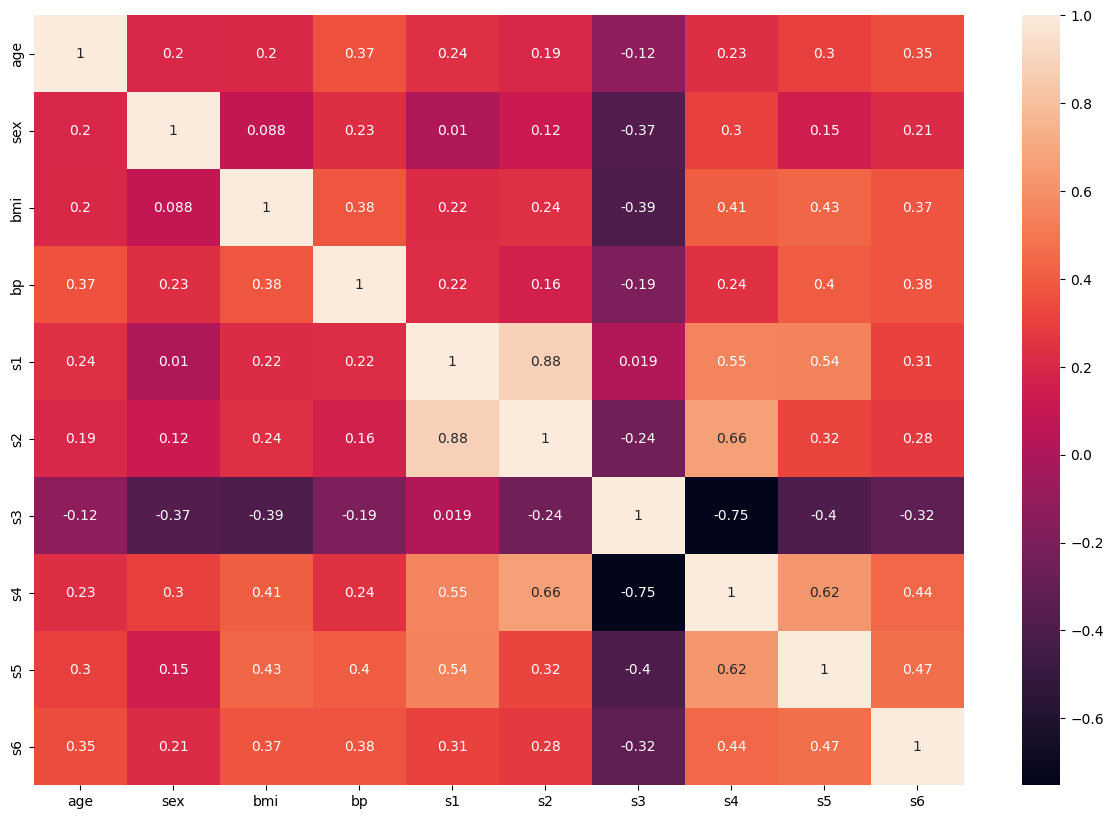

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10));
sns.heatmap(X_train.corr(), annot=True)

In [23]:
print(X_train.shape)
print(y_train.shape)


(353, 10)
(353,)


In [24]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor();
regressor.fit(X_train, y_train);

## Hyperparameter Tuning

In [27]:
param = {
    'criterion': ['squared_error', 'friendman_mse', 'absolute_error'],
    'splitter' : ['best', 'random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features': ['auto', 'sqrt', 'log2']
};


In [28]:
from sklearn.model_selection import GridSearchCV

regressor = DecisionTreeRegressor()
grid = GridSearchCV(regressor, param_grid = param, cv=5, scoring='neg_mean_squared_error');

import warnings;
warnings.filterwarnings('ignore')
grid.fit(X_train, y_train);

In [29]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [31]:
y_pred = grid.predict(X_test)

In [32]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.33126885935069184
50.268376097063246
4180.365757660161


In [35]:
## Training on the best parameters
model = DecisionTreeRegressor(criterion= 'squared_error', max_depth= 4, max_features= 'log2', splitter= 'best');

In [36]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, max_features='log2')

[Text(0.45535714285714285, 0.9, 'x[7] <= -0.013\nsquared_error = 5845.82\nsamples = 353\nvalue = 152.918'),
 Text(0.19642857142857142, 0.7, 'x[8] <= -0.036\nsquared_error = 3237.231\nsamples = 134\nvalue = 111.194'),
 Text(0.32589285714285715, 0.8, 'True  '),
 Text(0.10714285714285714, 0.5, 'x[5] <= 0.017\nsquared_error = 1818.331\nsamples = 66\nvalue = 90.818'),
 Text(0.07142857142857142, 0.3, 'x[2] <= 0.04\nsquared_error = 1716.427\nsamples = 65\nvalue = 89.415'),
 Text(0.03571428571428571, 0.1, 'squared_error = 1566.381\nsamples = 59\nvalue = 85.695'),
 Text(0.10714285714285714, 0.1, 'squared_error = 1717.333\nsamples = 6\nvalue = 126.0'),
 Text(0.14285714285714285, 0.3, 'squared_error = 0.0\nsamples = 1\nvalue = 182.0'),
 Text(0.2857142857142857, 0.5, 'x[3] <= 0.039\nsquared_error = 3820.323\nsamples = 68\nvalue = 130.971'),
 Text(0.21428571428571427, 0.3, 'x[9] <= -0.04\nsquared_error = 2030.258\nsamples = 54\nvalue = 113.963'),
 Text(0.17857142857142858, 0.1, 'squared_error = 181

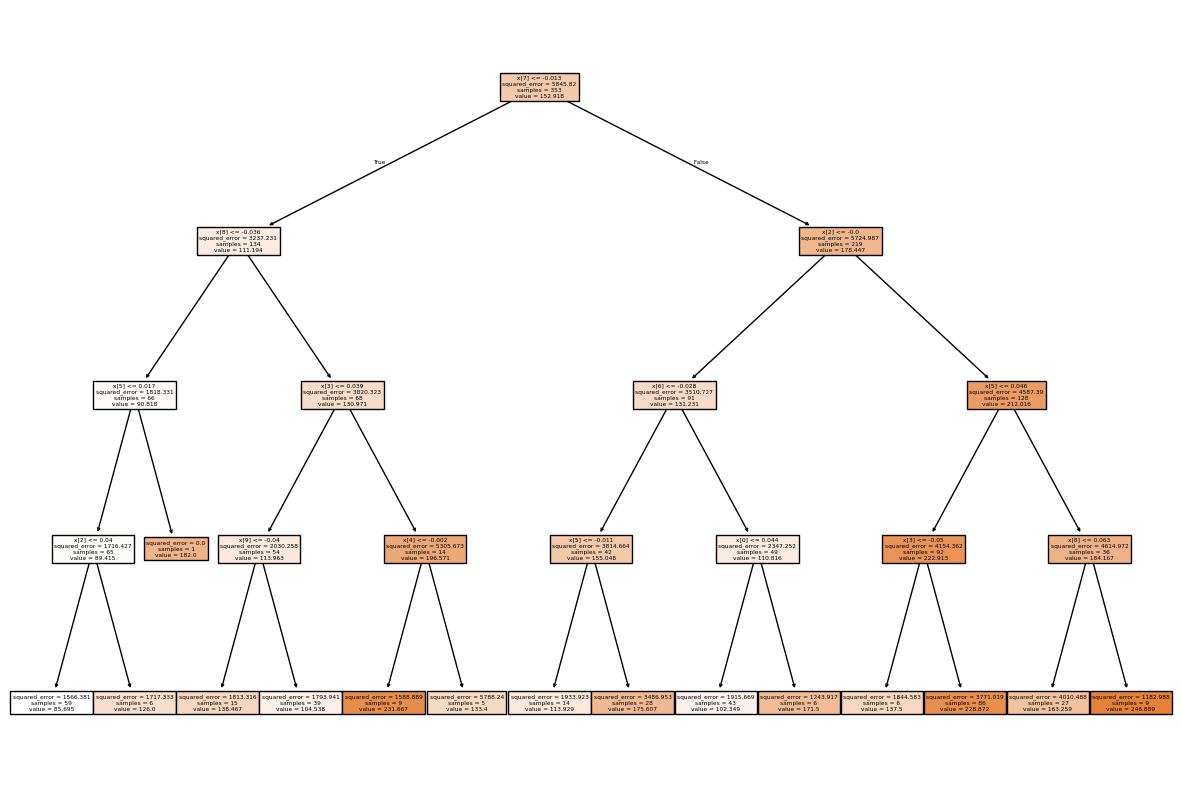

In [37]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(15, 10))
tree.plot_tree(model, filled = True)